In [2]:
import yt
from yt.utilities.physical_constants import mp #mass of proton
from yt.units import kpc

In [3]:
ds1 = yt.load("../Box0/Box0-L3-R1/DD0043/data0043")
ds2 = yt.load("../Box0/Box0-L3-R0/DD0017/data0017")
mu = 1.3 #mean molecular weight

yt : [INFO     ] 2021-07-19 10:16:40,694 Parameters: current_time              = 18.086012641084
yt : [INFO     ] 2021-07-19 10:16:40,695 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-07-19 10:16:40,695 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-07-19 10:16:40,696 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-07-19 10:16:40,697 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-07-19 10:16:40,698 Parameters: current_redshift          = 11.677357391944
yt : [INFO     ] 2021-07-19 10:16:40,699 Parameters: omega_lambda              = 0.685
yt : [INFO     ] 2021-07-19 10:16:40,700 Parameters: omega_matter              = 0.315
yt : [INFO     ] 2021-07-19 10:16:40,701 Parameters: omega_radiation           = 0
yt : [INFO     ] 2021-07-19 10:16:40,702 Parameters: hubble_constant           = 0.674
yt : [INFO     ] 2021-07-19 10:16:40,748 Parameters: current_time              = 7.1659484706477
yt 

In [4]:
@yt.derived_field(name=('gas','NumberDensity'), units = "1/cm**3", sampling_type = "local", force_override=True)
def _NumberDensity(field, data):
    return data[("gas", "density")]/(mu * mp)

In [6]:
sphere1 = ds1.sphere("max", (10, "kpc/h"))  #selects a sphere of data centered around the location of maximum density of radius 9.767 kpc/h
sphere2 = ds2.sphere("max",(10, "kpc/h"))

Parsing Hierarchy : 100%|█████████████████| 8205/8205 [00:01<00:00, 7636.73it/s]
yt : [INFO     ] 2021-07-19 10:16:52,127 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2021-07-19 10:17:04,596 Max Value is 6.51905e-16 at 0.4850135892629623 0.4827346354722977 0.5049210041761398
Parsing Hierarchy : 100%|█████████████████| 3377/3377 [00:00<00:00, 7504.86it/s]
yt : [INFO     ] 2021-07-19 10:17:05,187 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2021-07-19 10:17:12,019 Max Value is 1.24219e-16 at 0.5023728758096695 0.5063213855028152 0.5120720416307449


# Number Density Profile Plots


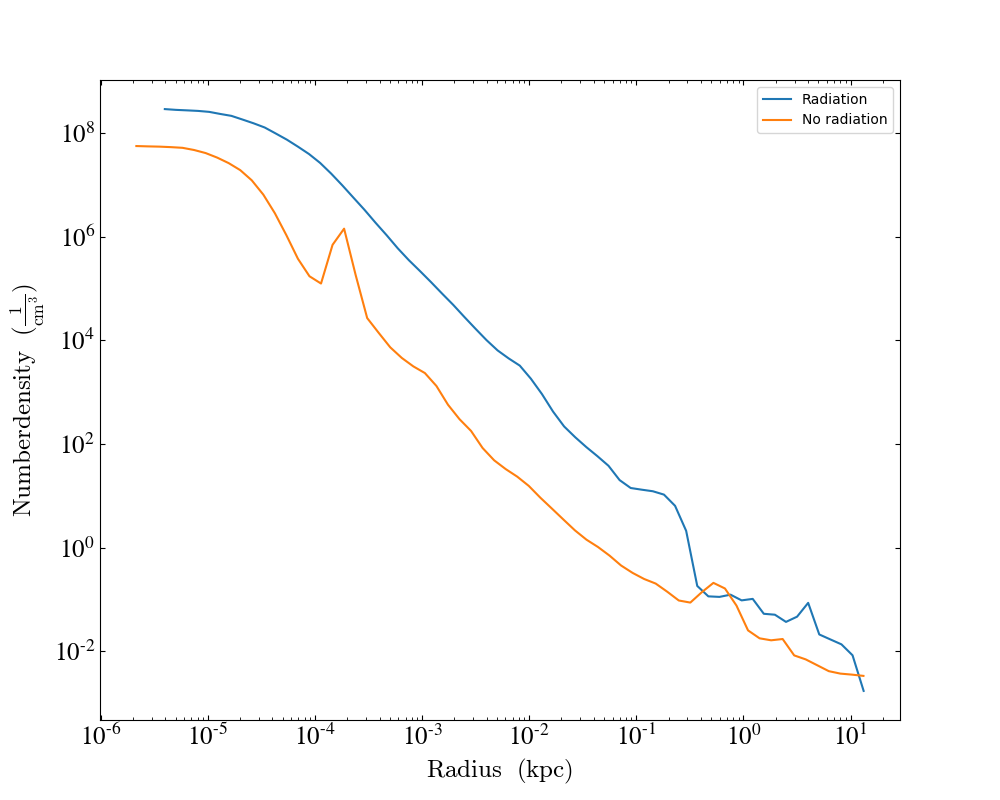

In [80]:
nd1_profile = yt.create_profile(sphere1, [("index","radius")], fields=[("gas","NumberDensity")])
nd2_profile = yt.create_profile(sphere2, [("index","radius")], fields=[("gas","NumberDensity")])
plot_nd = yt.ProfilePlot.from_profiles([nd1_profile, nd2_profile], labels=["Radiation", "No radiation"])
plot_nd.set_unit(("index", "radius"), "kpc")

# Temperature Profile Plots


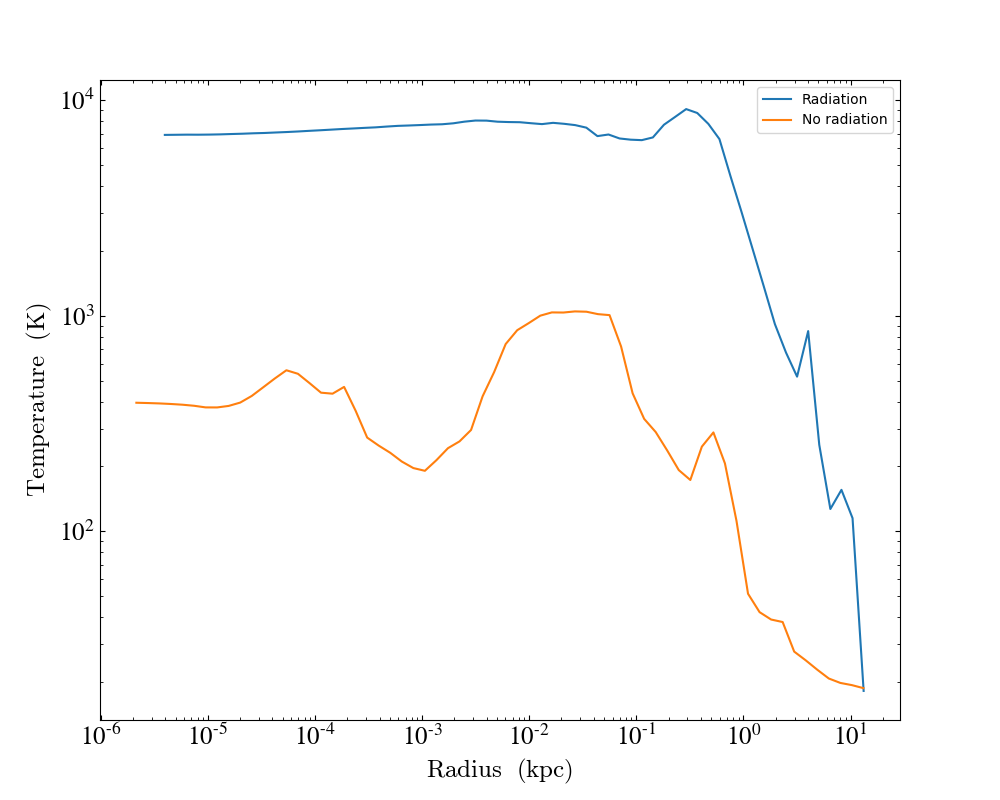

In [9]:
temp1_profile = yt.create_profile(sphere1, [("index","radius")], fields=[("gas","temperature")])
temp2_profile = yt.create_profile(sphere2, [("index","radius")], fields=[("gas","temperature")])
plot_temp = yt.ProfilePlot.from_profiles([temp1_profile, temp2_profile], labels=["Radiation", "No radiation"])
plot_temp.set_unit(("index", "radius"), "kpc")

# Number Density/Temperature Profile Plot


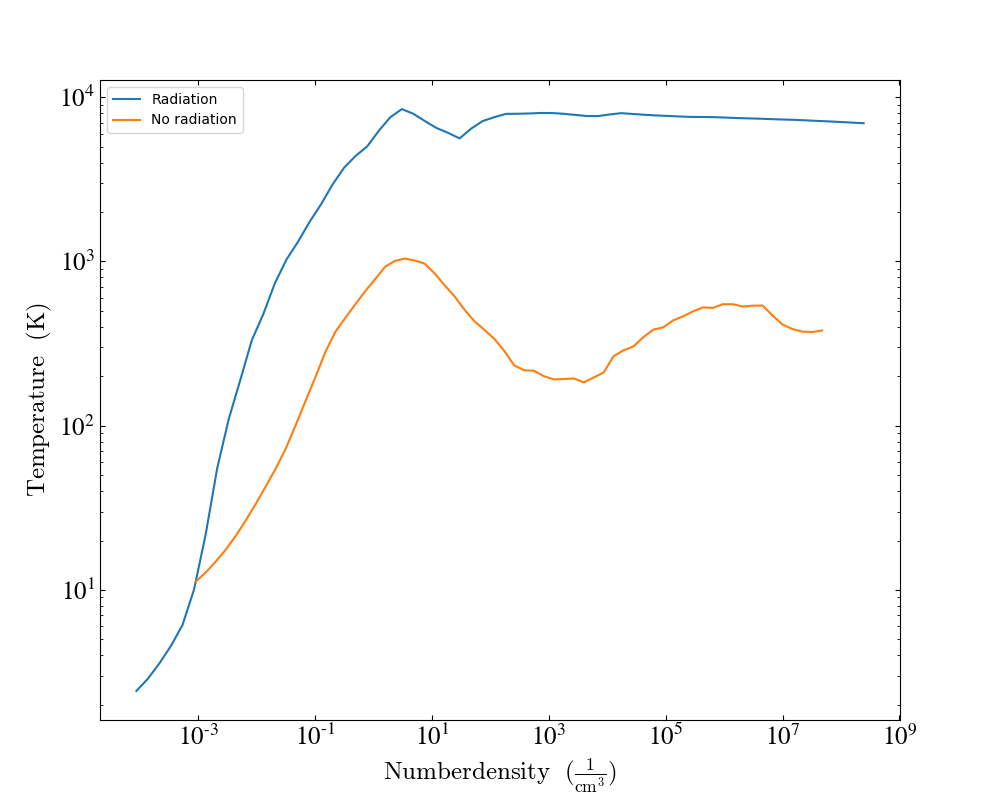

In [13]:
numd1_profile = yt.create_profile(sphere1, [("gas","NumberDensity")], fields=[("gas","temperature")])
numd2_profile = yt.create_profile(sphere2, [("gas","NumberDensity")], fields=[("gas","temperature")])
plot_numd = yt.ProfilePlot.from_profiles([numd1_profile, numd2_profile], labels=["Radiation", "No radiation"])
plot_numd.show()

# Number Density/Temperature Phase Plot

## Radiation


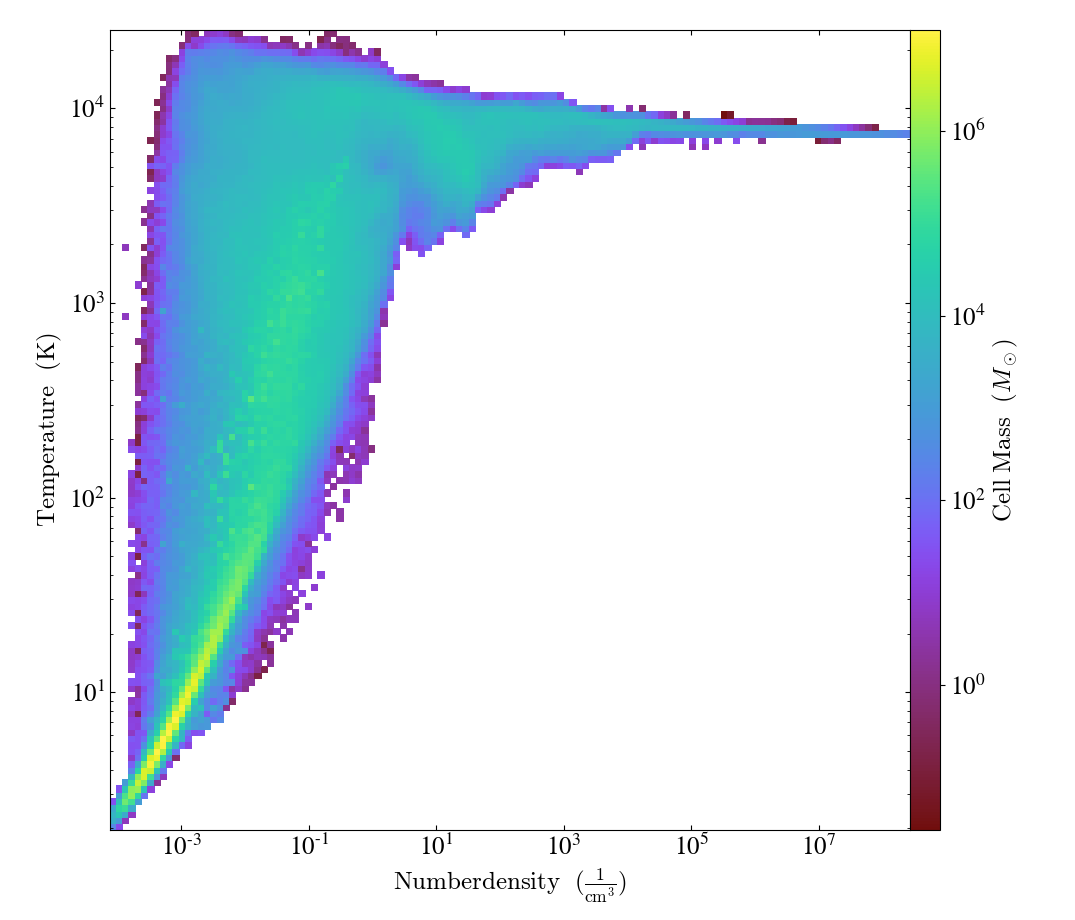

In [88]:
nd1_pplot = yt.PhasePlot(sphere1, "NumberDensity", ("gas","temperature"), "cell_mass",
                    weight_field=None)
nd1_pplot.set_unit("NumberDensity","cm**-3")
nd1_pplot.set_unit("cell_mass","msun")

## No Radiation


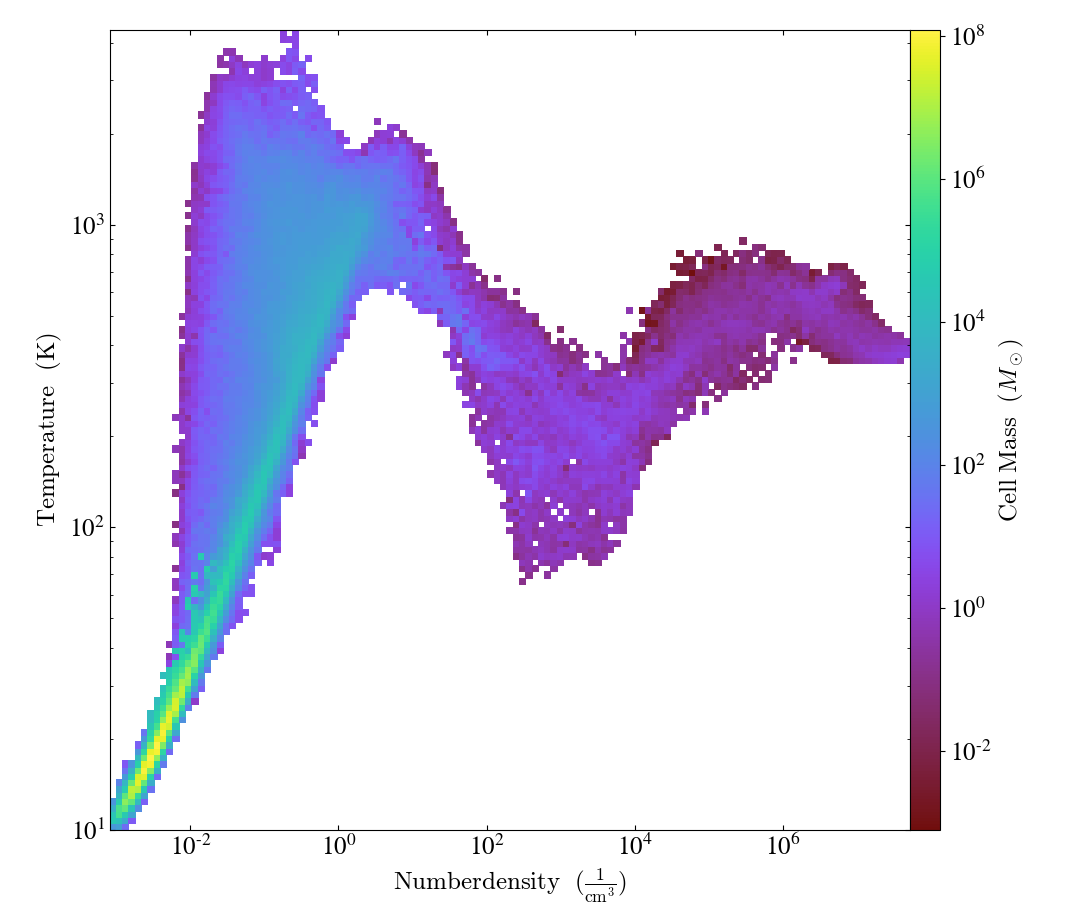

In [90]:
nd2_pplot = yt.PhasePlot(sphere2, "NumberDensity", ("gas","temperature"), "cell_mass",
                    weight_field=None)
nd2_pplot.set_unit("NumberDensity","cm**-3")
nd2_pplot.set_unit("cell_mass","msun")

At high densities, slightly higher temperatures might be explained by various dissociation processes .